Лабораторная работа №5

Вариант №17

Выполнил Плешко Георгий

5.1.17, 5.4.3, 5.5.3, 5.9.9

In [2]:
from IPython.display import Image
import numpy as np
import scipy.linalg
from numpy.linalg import solve
from scipy.linalg import solve_triangular
from matplotlib import pyplot as plt
%matplotlib inline



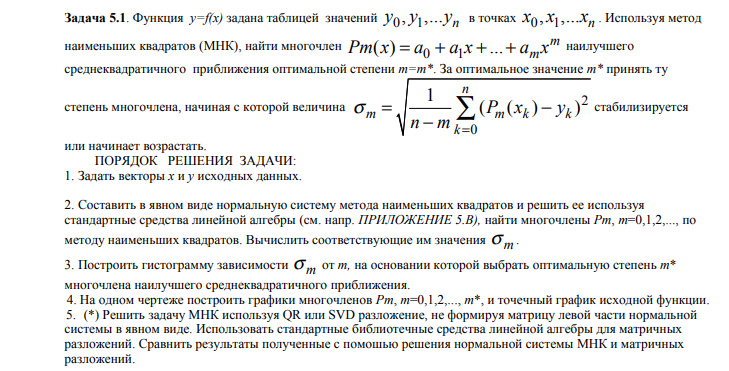

In [15]:
Image("5_1_17.png")

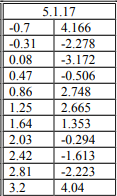

In [16]:
Image("5_1_17_2.png")

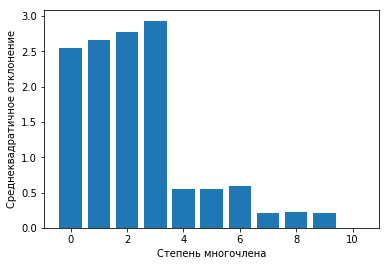

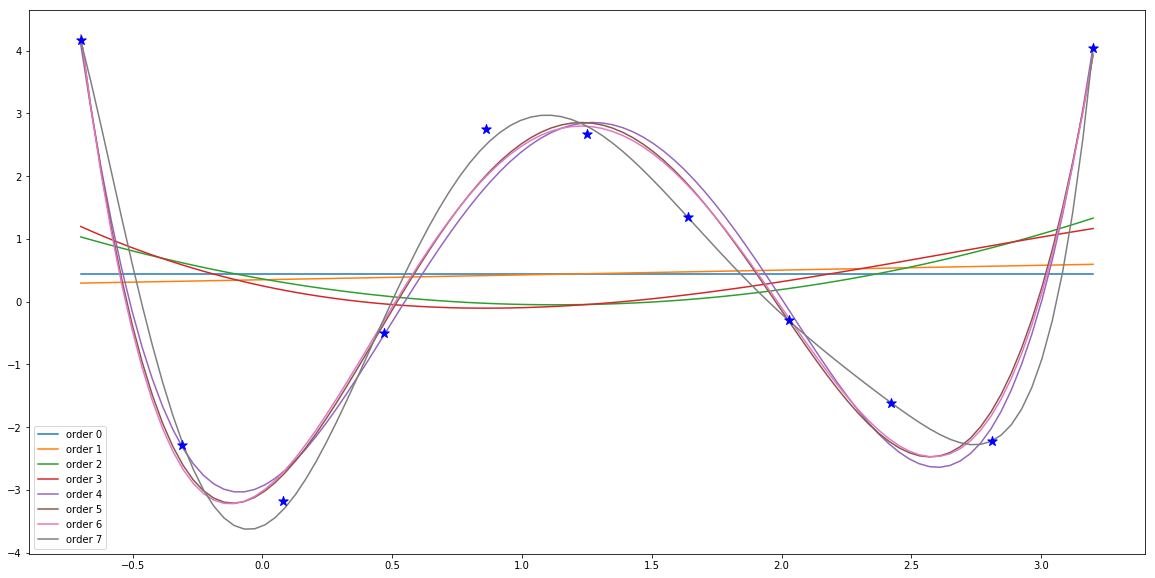

In [6]:
#Задание исходных данных
x = np.array([-0.7, -0.31, 0.08, 0.47, 0.86, 1.25,1.64, 2.03, 2.42, 2.81, 3.2])
y = np.array([4.166, -2.278, -3.172, -0.506, 2.748, 2.665, 1.353, -0.294, -1.613, -2.223, 4.04])

#метод наименьших квадратов
def mnk(x, y , m):
    t = np.array([x**exp for exp in range(m + 1)])
    rhs = t.dot(y)
    mat = np.empty((m+1, m+1))
    v = t.sum(axis = 1)
    for i in range(m+1):
        mat[i, :] = v
        v = np.roll(v, -1)
        v[-1] = np.sum(x**(i + m +1))
    return np.linalg.solve(mat, rhs)[::-1]

def err(p, x, y, m): #cреднеквадратичное отклонение
    return np.linalg.norm(p(x) - y)/np.sqrt(len(x) - m)

polynoms = np.array([np.poly1d(mnk(x,y,m)) for m in range(len(x))])
errors = np.array([err(p,x,y,p.order) for p in polynoms])

plt.bar(range(len(polynoms)), errors)
plt.ylabel("Среднеквадратичное отклонение")
plt.xlabel("Степень многочлена")
plt.show()

values = np.linspace(x.min(), x.max(), 100)
plt.figure(figsize = (20,10))
plt.scatter(x,y, c = 'blue', marker = '*', s = 100, zorder = len(polynoms)+1)
for i in range(8):
    plt.plot(values, polynoms[i](values), label = 'order '+ str(polynoms[i].order), zorder = i)
plt.legend()
plt.show()

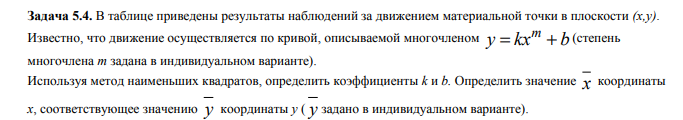

In [18]:
Image("5_4_3.png")

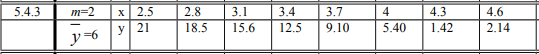

In [19]:
Image("5_4_3_2.png")

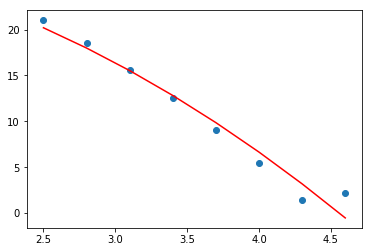

In [38]:
m = 2
y_ = 6
x = np.array([2.5,2.8,3.1,3.4,3.7,4,4.3,4.6])
y = np.array([21,18.5,15.6,12.5,9.1,5.4,1.42,2.14])
x.shape, y.shape

def mnk(x, y):
    P = np.array([x**j for j in [0,2]]).T
    A = np.dot(P.T, P)
    b = np.dot(P.T, y)
    return solve(A, b)[::-1]

coef = mnk(x,y)
k,b = coef

np.sqrt((y_-b)/k)



plt.figure()
plt.scatter(x,y,)
plt.plot(x, k*x**m+b,c='red')

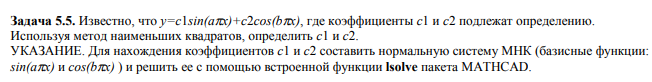

In [20]:
Image("5_5_3.png")

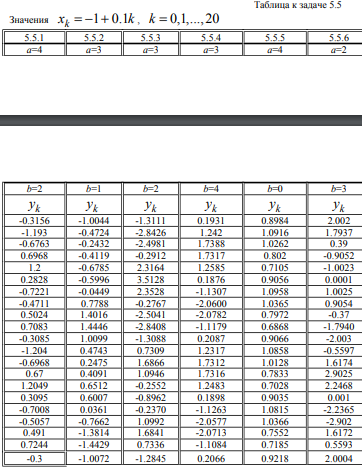

In [22]:
Image("5_.png")

In [8]:
x=np.array([-1+0.1*k for k in range(0,21)])
Y=np.array([-1.3111,-2.8426,-2.4981,-0.2912,2.3164,3.5128,2.3528,-0.2767,-2.5041,-2.8408,-1.3088,0.7309,
           1.6866,1.0946,-0.2552,-0.8962,-0.2370,1.0992,1.6841,0.7336,-1.2845])

a=3
b=2
def f_1(x):
    return np.sin(a*np.pi*x)

def f_2(x):
    return np.cos(b*np.pi*x)


f_s=[f_1,f_2]
A=np.hstack((f_1(x)[:,None],f_2(x)[:,None]))

np.linalg.solve(A.T.dot(A),A.T.dot(Y))

array([ 2.20420807, -1.30181979])